In [16]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8]

In [2]:
os.listdir('../data')

['holidays_events.csv',
 'items.csv',
 'oil.csv',
 'sample_submission.csv',
 'stores.csv',
 'test.csv',
 'train.csv',
 'transactions.csv']

In [3]:
train = pd.read_csv('../data/train.csv', parse_dates = ['date'])

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
train.shape

(125497040, 6)

In [5]:
train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN


In [6]:
store_sub = train[(train['store_nbr'] == 44) & (train['item_nbr'] == 1503844)]
store_sub.reset_index(drop = True, inplace = True)

In [7]:
store_sub.head(200)

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,16377457,2014-01-02,44,1503844,966.1490,NaN
1,16442863,2014-01-03,44,1503844,663.4050,NaN
2,16511061,2014-01-04,44,1503844,1075.0000,NaN
3,16578789,2014-01-05,44,1503844,892.6080,NaN
4,16642520,2014-01-06,44,1503844,261.5540,NaN
5,16705308,2014-01-07,44,1503844,646.7160,NaN
6,16768213,2014-01-08,44,1503844,1165.2097,NaN
7,16830673,2014-01-09,44,1503844,620.6760,NaN
8,16892999,2014-01-10,44,1503844,602.2430,NaN
9,16960548,2014-01-11,44,1503844,1090.4050,NaN


In [102]:
store_sub.shape

(1016, 6)

Text(0.5, 1.0, 'Monthly sales')

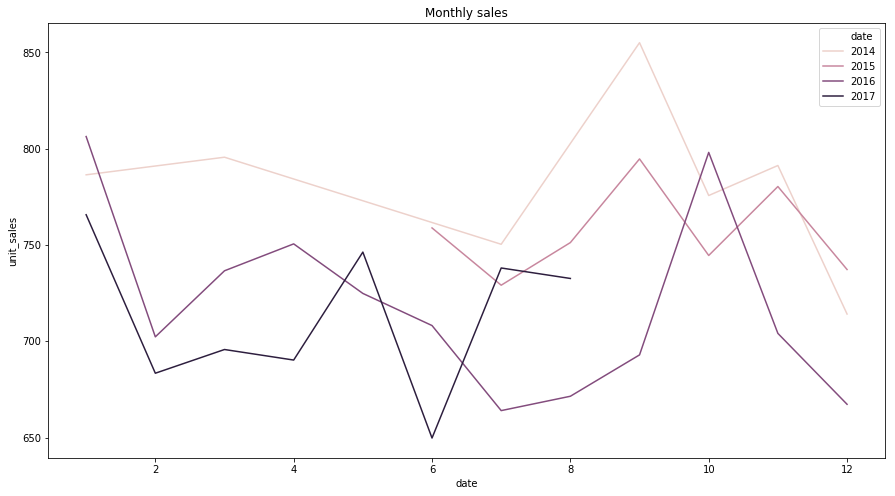

In [10]:
ax = sns.lineplot(x = store_sub['date'].dt.month , y = store_sub['unit_sales'], hue = store_sub['date'].dt.year, ci  = None)
ax.set_title('Monthly sales')

Text(0.5, 1.0, 'Within week sales')

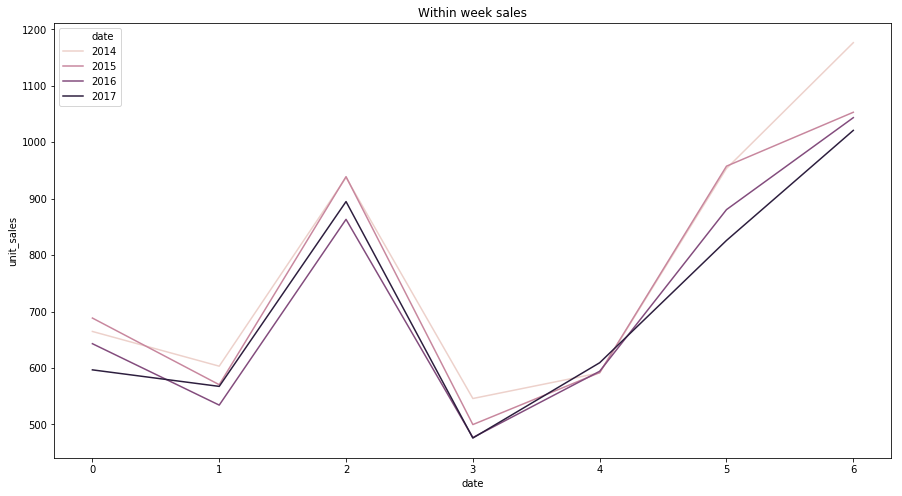

In [14]:
ax = sns.lineplot(x = store_sub['date'].dt.dayofweek , y = store_sub['unit_sales'], hue = store_sub['date'].dt.year, ci  = None)
ax.set_title('Within week sales')

Text(0.5, 1.0, 'Daily sales')

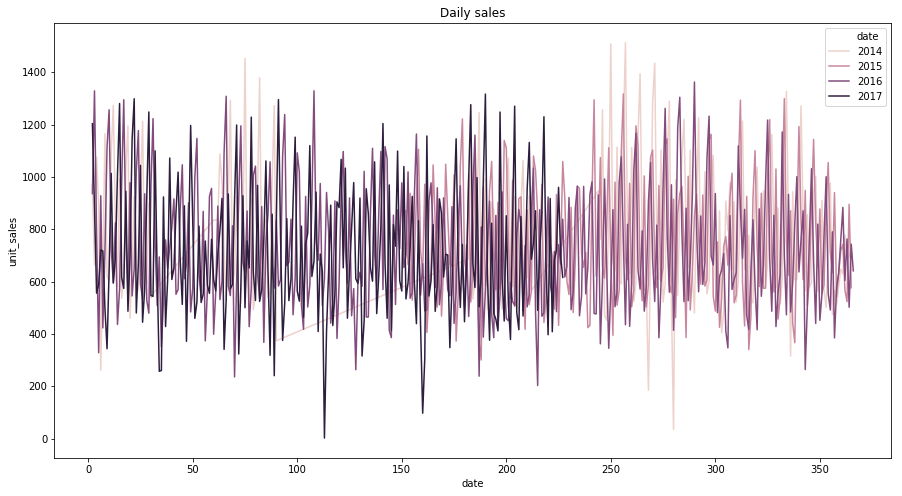

In [11]:
ax = sns.lineplot(x = store_sub['date'].dt.dayofyear , y = store_sub['unit_sales'], hue = store_sub['date'].dt.year, ci  = None)
ax.set_title('Daily sales')

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

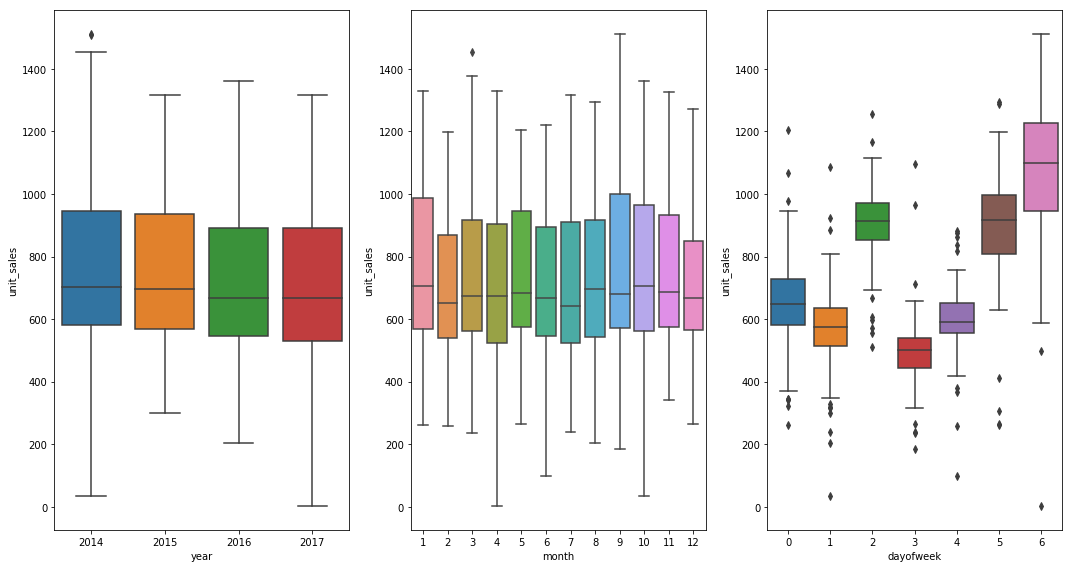

In [31]:
store_sub['year'] = [d.year for d in store_sub.date]
store_sub['month'] = [d.month for d in store_sub.date]
store_sub['dayofyear'] = [d.dayofyear for d in store_sub.date]
store_sub['dayofweek'] = [d.dayofweek for d in store_sub.date]

# Draw Plot
fig, axes = plt.subplots(1, 3)
sns.boxplot(x = 'year', y = 'unit_sales', data = store_sub, ax = axes[0])
sns.boxplot(x = 'month', y = 'unit_sales', data = store_sub, ax = axes[1])
sns.boxplot(x = 'dayofweek', y = 'unit_sales', data = store_sub, ax = axes[2])
fig.tight_layout()

In [32]:
from statsmodels.tsa.stattools import adfuller, kpss

In [34]:
# ADF test
result = adfuller(store_sub['unit_sales'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'{key}, {value}')
    
# since p-value less than 0.05, reject the null hypothesis that the data is non-stationary

ADF Statistic: -4.851495278589423
p-value: 4.3304147130748785e-05
Critial Values:
1%, -3.43694584277544
Critial Values:
5%, -2.8644520725172873
Critial Values:
10%, -2.5683205291305176


In [35]:
from pandas.plotting import autocorrelation_plot

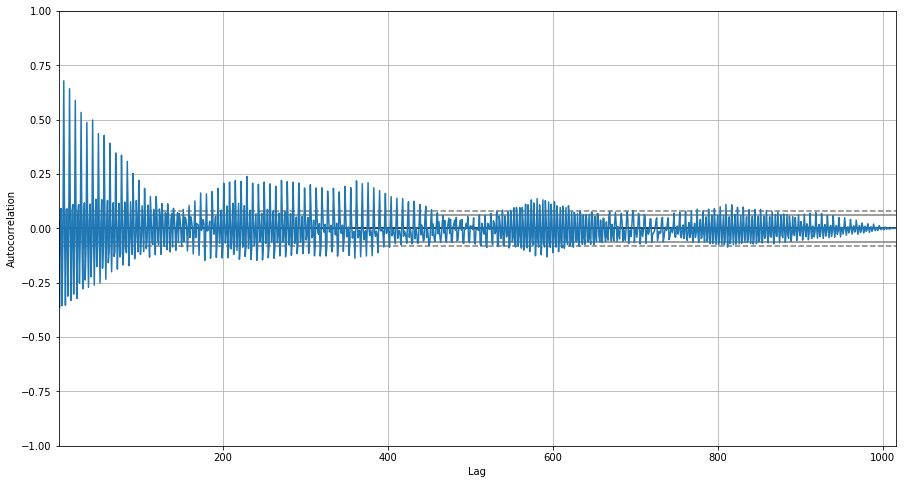

In [36]:
fig = autocorrelation_plot(store_sub['unit_sales'])

In [50]:
from pysal.model.spreg import ols, ml_error, ml_lag
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [51]:
train_ratio = 0.7
train, test = store_sub.iloc[:round(train_ratio * store_sub.shape[0]), :], store_sub.iloc[round(train_ratio * store_sub.shape[0]):, :]
train.reset_index(drop = True, inplace = True)
test.reset_index(drop = True, inplace = True)

print(train.shape)
print(test.shape)

(711, 11)
(305, 11)


In [53]:
p, d, q = 7, 1, 0
model  = ARIMA(train['unit_sales'], order = (p, d, q))
model_fit = model.fit(disp = 0)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.unit_sales   No. Observations:                  710
Model:                 ARIMA(7, 1, 0)   Log Likelihood               -4648.267
Method:                       css-mle   S.D. of innovations            167.937
Date:                Sun, 08 Sep 2019   AIC                           9314.534
Time:                        15:37:08   BIC                           9355.622
Sample:                             1   HQIC                          9330.407
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0011      1.227      0.001      0.999      -2.405       2.407
ar.L1.D.unit_sales    -0.7522      0.037    -20.107      0.000      -0.826      -0.679
ar.L2.D.unit_sales    -0.8221      0.041    -20.029      0.000      -0.902      -0.742
ar.L3.D.unit_sales    -0.7216      0.044    -16.274      0.000      -0.809      -0.635
ar.L4.D.unit_sales    -0.6587      0.046    -14.416      0.000      -0.748      -0.569
ar.L5.D.unit_sales    -0.6996      0.044    -15.813      0.000      -0.786      -0.613
ar.L6.D.unit_sales    -0.6069      0.041    -14.732      0.000      -0.688      -0.526
ar.L7.D.unit_sales     0.1069      0.038      2.841      0.005       0.033       0.181
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9845           -0.4754j            1.0933           -0.4284
AR.2           -0.9845           +0.4754j            1.0933            0.4284
AR.3           -0.2274           -0.9970j            1.0226           -0.2857
AR.4           -0.2274           +0.9970j            1.0226            0.2857
AR.5            0.6512           -0.8227j            1.0492           -0.1434
AR.6            0.6512           +0.8227j            1.0492            0.1434
AR.7            6.7971           -0.0000j            6.7971           -0.0000
-----------------------------------------------------------------------------
"""

                0
count  710.000000
mean    -0.607859
std    169.434950
min   -655.931398
25%   -100.464490
50%     -2.668723
75%     88.887643
max    830.945060


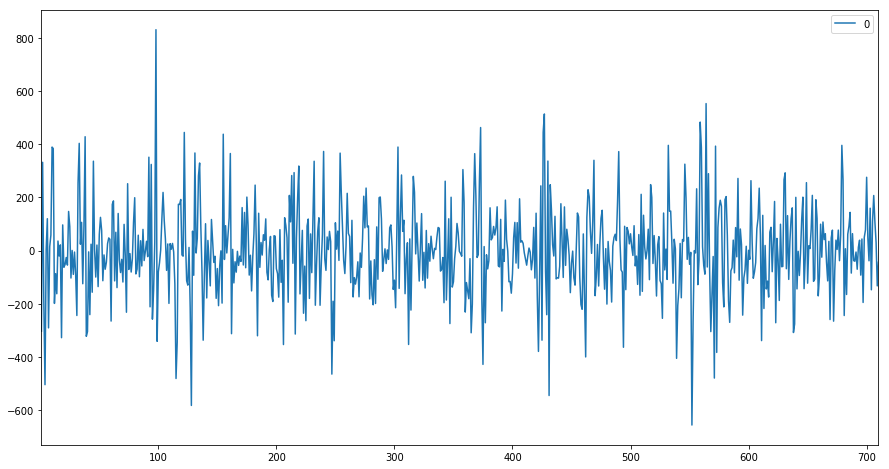

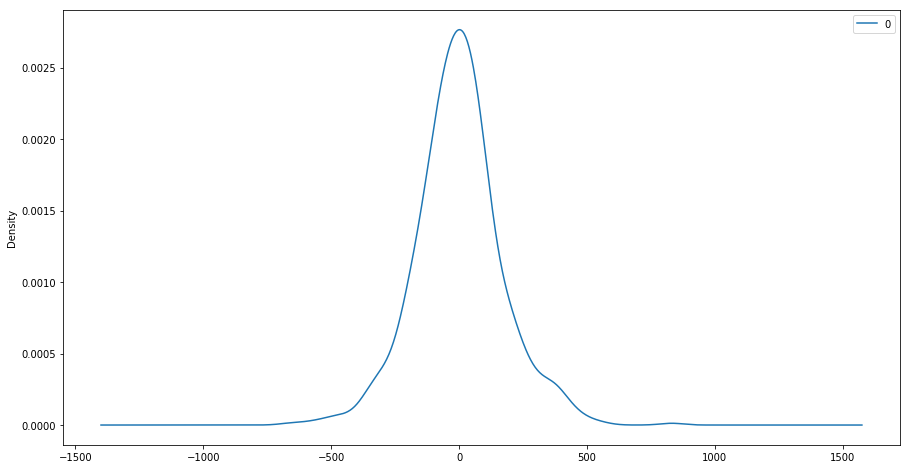

In [54]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind = 'kde')
print(residuals.describe())

In [55]:
history = list(train['unit_sales'])
predictions = []

for i in range(len(test)):
    model = ARIMA(history, order = (p, d, q))
    model_fit = model.fit(disp = 0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test.iloc[i]['unit_sales']
    history.append(obs)
    print('predicted = {}, expected = {}'.format(yhat, obs))

predicted = [547.88057703], expected = 526.693
predicted = [660.41572249], expected = 678.1469999999999
predicted = [1118.32927497], expected = 929.0
predicted = [1146.45712668], expected = 1362.5539999999999
predicted = [811.54982328], expected = 811.013
predicted = [592.09759151], expected = 560.811
predicted = [870.29195679], expected = 850.405
predicted = [645.64712382], expected = 588.568
predicted = [651.14895814], expected = 672.6080000000001
predicted = [928.52794438], expected = 1072.54
predicted = [1258.64081245], expected = 1232.135
predicted = [786.24880561], expected = 697.0139999999999
predicted = [604.80116874], expected = 663.555
predicted = [880.1868041], expected = 936.513
predicted = [680.68085848], expected = 481.23199999999997
predicted = [630.40571542], expected = 619.4209999999999
predicted = [1035.49765646], expected = 643.769
predicted = [1027.35157515], expected = 706.9789999999999
predicted = [608.22343765], expected = 411.24199999999996
predicted = [619.1366

predicted = [846.47364068], expected = 857.4939999999999
predicted = [614.6994614], expected = 240.08599999999998
predicted = [440.72153576], expected = 835.58
predicted = [838.56831335], expected = 1295.506
predicted = [1066.14313825], expected = 771.321
predicted = [549.19388811], expected = 374.852
predicted = [446.27516587], expected = 517.284
predicted = [840.10819121], expected = 840.6419999999999
predicted = [365.24574345], expected = 527.062
predicted = [797.62217095], expected = 610.309
predicted = [1107.41439736], expected = 904.0989999999999
predicted = [705.21699071], expected = 1151.877
predicted = [529.61812477], expected = 562.864
predicted = [575.69870449], expected = 524.9630000000001
predicted = [838.31863449], expected = 811.691
predicted = [604.79851361], expected = 463.135
predicted = [559.26368584], expected = 743.7410000000001
predicted = [918.81404549], expected = 784.074
predicted = [986.07811864], expected = 1119.629
predicted = [628.26254916], expected = 619.

In [56]:
error = mean_squared_error(test['unit_sales'], predictions)
print('Test MSE: {}'.format(error))

Test MSE: 39760.58922257469
